In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adilshamim8/student-depression-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\deepakreddy\.cache\kagglehub\datasets\adilshamim8\student-depression-dataset\versions\1


In [24]:
import pandas as pd

In [25]:
df = pd.read_csv(path + "/Student_Depression_Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [26]:
df.shape

(27901, 18)

In [27]:
df['Profession'].value_counts() # data is imbalanced, sill only consider the student records

Profession
Student                     27870
Architect                       8
Teacher                         6
'Digital Marketer'              3
'Content Writer'                2
Chef                            2
Doctor                          2
Pharmacist                      2
'Civil Engineer'                1
'UX/UI Designer'                1
'Educational Consultant'        1
Manager                         1
Lawyer                          1
Entrepreneur                    1
Name: count, dtype: int64

In [28]:
df = df[df['Profession'] == 'Student']

In [29]:
## encode the 2 categorical variables
cat_map = {'No': 0, 'Yes': 1}
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map(cat_map)


df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map(cat_map)

In [30]:
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,1,3.0,1.0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,0,3.0,2.0,1,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,0,9.0,1.0,1,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,1,4.0,5.0,1,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,1,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',1,7.0,1.0,1,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,0,0.0,3.0,1,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,0,12.0,2.0,0,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',1,10.0,5.0,0,1


In [31]:
df.corr(numeric_only=True)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Have you ever had suicidal thoughts ?,Work/Study Hours,Family History of Mental Illness,Depression
id,1.000000,0.004032,0.005181,0.001262,-0.012021,0.007861,0.001933,0.004579,-0.004189,-0.005227,0.001025
Age,0.004032,1.000000,-0.075871,0.002018,0.005167,0.009131,-0.000428,-0.113654,-0.032775,-0.004973,-0.226738
Academic Pressure,0.005181,-0.075871,1.000000,-0.022236,-0.022325,-0.110903,-0.024949,0.261580,0.096291,0.030122,0.474805
Work Pressure,0.001262,0.002018,-0.022236,1.000000,-0.050919,-0.021154,0.770652,-0.001000,-0.005474,-0.006210,-0.003345
CGPA,-0.012021,0.005167,-0.022325,-0.050919,1.000000,-0.044227,-0.053656,0.008344,0.002613,-0.003717,0.022164
Study Satisfaction,0.007861,0.009131,-0.110903,-0.021154,-0.044227,1.000000,-0.021915,-0.083652,-0.036510,-0.003789,-0.168132
Job Satisfaction,0.001933,-0.000428,-0.024949,0.770652,-0.053656,-0.021915,1.000000,-0.003384,-0.005230,-0.010012,-0.003472
Have you ever had suicidal thoughts ?,0.004579,-0.113654,0.261580,-0.001000,0.008344,-0.083652,-0.003384,1.000000,0.121851,0.026144,0.546434
Work/Study Hours,-0.004189,-0.032775,0.096291,-0.005474,0.002613,-0.036510,-0.005230,0.121851,1.000000,0.017488,0.209024
Family History of Mental Illness,-0.005227,-0.004973,0.030122,-0.006210,-0.003717,-0.003789,-0.010012,0.026144,0.017488,1.000000,0.053442


In [33]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [36]:
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [37]:
## Analysis

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

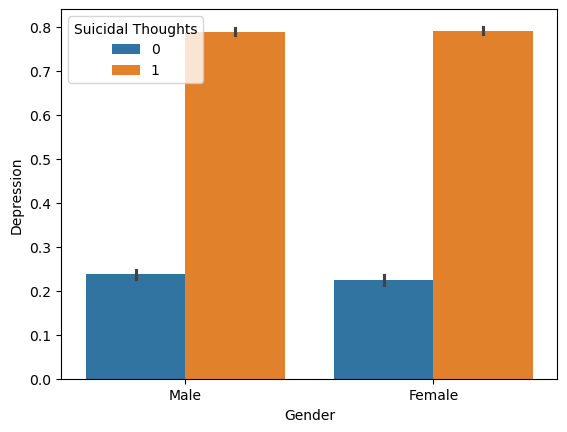

In [44]:
sns.barplot(x='Gender', y='Depression', hue='Have you ever had suicidal thoughts ?', data=df)
plt.legend(title='Suicidal Thoughts')

In [50]:
df['Age'].describe()

count    27870.000000
mean        25.821134
std          4.906574
min         18.000000
25%         21.000000
50%         25.000000
75%         30.000000
max         59.000000
Name: Age, dtype: float64

In [55]:
df[['Age', 'Depression']].value_counts()

Age   Depression
20.0  1             1579
24.0  1             1506
28.0  1             1306
18.0  1             1216
21.0  1             1166
33.0  0             1155
29.0  1             1100
19.0  1             1100
25.0  1             1079
34.0  0             1066
23.0  1             1047
27.0  1              886
29.0  0              847
28.0  0              823
24.0  0              749
31.0  0              741
33.0  1              737
25.0  0              702
22.0  1              700
31.0  1              684
30.0  0              671
26.0  1              663
20.0  0              658
32.0  1              651
      0              607
23.0  0              594
27.0  0              575
21.0  0              557
26.0  0              491
30.0  1              474
19.0  0              460
22.0  0              459
34.0  1              401
18.0  0              371
35.0  0                8
36.0  0                6
38.0  0                6
48.0  0                2
37.0  0                2
38.0  1 

<Axes: >

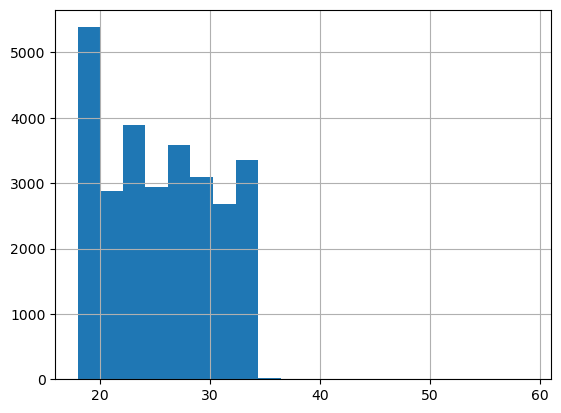

In [51]:
df['Age'].hist(bins=20)

# Data Visualization
Visualize the distribution of depression and its correlation with other features.

In [ ]:
# Visualize the distribution of depression
sns.countplot(x='Depression', data=df)
plt.title('Distribution of Depression')
plt.show()

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Predictive Modeling
Build a predictive model to classify depression based on the dataset.

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# Prepare the data
X = df.drop(['Depression'], axis=1)._get_numeric_data()
y = df['Depression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))